In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import pandas as pd
import matplotlib.animation as animation
import numpy as np
from scipy.interpolate import griddata
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import os
import matplotlib.dates as mdates
import matplotlib as mpl
import re
from itertools import chain
import matplotlib
import matplotlib.ticker as ticker
import scipy.io
from statsmodels.nonparametric.smoothers_lowess import lowess
import gsw
from scipy.stats import pearsonr
from matplotlib.pyplot import cm
from cartopy import config
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotx
from cycler import cycler
from matplotlib.dates import date2num
import cartopy.feature as cfeature  #adding features in the map
#import gpxpy
import xml.etree.ElementTree as ET
import plotly.graph_objs as go

In [2]:
os.chdir('C:/Users/piago/Documents/Uni/5_Semester/Hiwi')
csv_file = "C:/Users/piago/Documents/Uni/5_Semester/Hiwi/Data/HE614_All_Grids_Single_Sheet.xlsx"

# Read the Excel file
df = pd.read_excel(csv_file, skiprows=10)
df = df.set_index('Date_Time')
df.index = pd.to_datetime(df.index)

In [3]:
# subset only one day 
df = df.loc['2023-03-09']

In [4]:
df.to_csv('C:/Users/piago/Documents/Uni/5_Semester/Hiwi/Data/HE614_All_Grids_0903.csv')

In [16]:
df = pd.read_csv('C:/Users/piago/Documents/Uni/5_Semester/Hiwi/Data/HE614_All_Grids_0903.csv')
df = df.set_index('Date_Time')
df.index = pd.to_datetime(df.index)

In [17]:
df.head()

,Event_label,Latitude,Longitude,Campbell_Barometric_Pressure,Campbell_Relative_Humidity,Campbell_Air_Temperature,Campbell_Dew_Point,Campbell_Wind_Speed,Campbell_Wind_Direction_True,Campbell_UVA,...,Quality_Thies_Relative_Humidity_3_AVG,Quality_Thies_Relative_Humidity_4_AVG,Quality_Thies_Relative_Humidity_5_AVG,Quality_Thies_Relative_Humidity_CUS_AVG,Precipitation_Amount,Wind_Speed_U10,Surfactant_Concentration_SML,Surfactant_Concentration_100cm,Quality_Surfactant_Concentration_SML,Quality_Surfactant_Concentration_100cm
Date_Time,,,,,,,,,,,,,,,,,,,,,
2023-03-09 07:28:00,HE614_16-03,54.878333,7.126683,997.3,61,3.2,-3.3,4.83,122,10.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-09 07:28:10,HE614_16-03,54.878333,7.126700,997.4,63,3.1,-3.1,3.57,124,11.62,...,NaN,NaN,NaN,NaN,NaN,3.378647,NaN,NaN,NaN,NaN
2023-03-09 07:28:20,HE614_16-03,54.878167,7.126717,997.4,63,3.1,-3.1,3.57,124,11.62,...,NaN,NaN,NaN,NaN,NaN,3.252706,NaN,NaN,NaN,NaN
2023-03-09 07:28:30,HE614_16-03,54.878000,7.126750,997.4,63,3.1,-3.1,3.57,124,11.62,...,NaN,NaN,NaN,NaN,NaN,3.716414,NaN,NaN,NaN,NaN
2023-03-09 07:28:40,HE614_16-03,54.878000,7.126833,997.4,63,3.2,-3.1,3.84,117,11.72,...,NaN,NaN,NaN,NaN,NaN,3.292637,NaN,NaN,NaN,NaN


In [18]:
df.rename(columns={'CTD_Temperature_SML' : 'CTD_Temp_SML',
                   'CTD_Temperature_30cm' : 'CTD_Temperature_30cm_[°C]',
                   'CTD_Temperature_40cm' : 'CTD_Temperature_40cm_[°C]',
                   'CTD_Temperature_85cm' : 'CTD_Temperature_85cm_[°C]',
                   'CTD_Temperature_100cm' : 'CTD_Temperature_100cm_[°C]'}, inplace= True)

In [19]:
df.head()
df=df.dropna(how='all', subset=df.columns)
df.head()

,Event_label,Latitude,Longitude,Campbell_Barometric_Pressure,Campbell_Relative_Humidity,Campbell_Air_Temperature,Campbell_Dew_Point,Campbell_Wind_Speed,Campbell_Wind_Direction_True,Campbell_UVA,...,Quality_Thies_Relative_Humidity_3_AVG,Quality_Thies_Relative_Humidity_4_AVG,Quality_Thies_Relative_Humidity_5_AVG,Quality_Thies_Relative_Humidity_CUS_AVG,Precipitation_Amount,Wind_Speed_U10,Surfactant_Concentration_SML,Surfactant_Concentration_100cm,Quality_Surfactant_Concentration_SML,Quality_Surfactant_Concentration_100cm
Date_Time,,,,,,,,,,,,,,,,,,,,,
2023-03-09 07:28:00,HE614_16-03,54.878333,7.126683,997.3,61,3.2,-3.3,4.83,122,10.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-09 07:28:10,HE614_16-03,54.878333,7.126700,997.4,63,3.1,-3.1,3.57,124,11.62,...,NaN,NaN,NaN,NaN,NaN,3.378647,NaN,NaN,NaN,NaN
2023-03-09 07:28:20,HE614_16-03,54.878167,7.126717,997.4,63,3.1,-3.1,3.57,124,11.62,...,NaN,NaN,NaN,NaN,NaN,3.252706,NaN,NaN,NaN,NaN
2023-03-09 07:28:30,HE614_16-03,54.878000,7.126750,997.4,63,3.1,-3.1,3.57,124,11.62,...,NaN,NaN,NaN,NaN,NaN,3.716414,NaN,NaN,NaN,NaN
2023-03-09 07:28:40,HE614_16-03,54.878000,7.126833,997.4,63,3.2,-3.1,3.84,117,11.72,...,NaN,NaN,NaN,NaN,NaN,3.292637,NaN,NaN,NaN,NaN


In [20]:
# drop outlier
print(f'values larger than 6.2: {sum(df['CTD_Temp_SML']>6.2)}') # one outlier
df.drop(df[df['CTD_Temp_SML']>6.2].index, inplace = True)
print(f'values larger than 6.2: {sum(df['CTD_Temp_SML']>6.2)}')


values larger than 6.2: 1
values larger than 6.2: 0


In [79]:
#Detrending SML temperature with numpy poylonialfit

# time in total seconds
df['time_numeric'] = (df.index - df.index.min()).total_seconds()  

# fit polynomial with numpy.polyfit: linear and quadratic


coefficients = np.polyfit(df['time_numeric'], df['CTD_Temp_SML'], 2) # fit polynomial
polynomial = np.poly1d(coefficients) #create function
df[f'fitted_2_Temp_SML'] = polynomial(df['time_numeric']) #values
df[f'Temp_SML_detrend'] = df['CTD_Temp_SML'] - df[f'fitted_2_Temp_SML']
df[f'Temp_SML_detrend'] = df[f'Temp_SML_detrend'] + df[f'fitted_2_Temp_SML'].median()


In [80]:
# same for all depths
depths = [30, 40, 60, 85, 100]

for d in depths:
    coefficients = np.polyfit(df['time_numeric'], df[f'CTD_Temperature_{d}cm_[°C]'], 2) # fit polynomial
    polynomial = np.poly1d(coefficients) #create function
    df[f'fitted_2_Temp_{d}'] = polynomial(df['time_numeric']) #values
    df[f'2_Temp_{d}_detrend'] = df[f'CTD_Temperature_{d}cm_[°C]'] - df[f'fitted_2_Temp_{d}']
    df[f'2_Temp_{d}_detrend'] = df[f'2_Temp_{d}_detrend'] + df[f'fitted_2_Temp_{d}'].median()


# devide runs
df_first = df[df['time_numeric']<(df['time_numeric'].max())*0.5] # first run 
df_second = df[df['time_numeric']>=(df['time_numeric'].max())*0.5] # second run

runs = [df_first, df_second]

In [87]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x = df.index,
    y = df['Campbell_Air_Temperature'],
    mode = 'lines',
    name = 'Campbell'
))

fig.add_trace(go.Scatter(
    x=df.index, 
    y = df['Temp_SML_detrend'], 
    mode = 'lines',
    name = 'temp',
    yaxis='y2'
))

fig.update_layout(
    title = 'Wind Speed over time',
    xaxis_title = 'Time',
    yaxis_title = 'Windspeed [m/s]',   
    yaxis2=dict(title='Temp', overlaying='y', side='right'
))

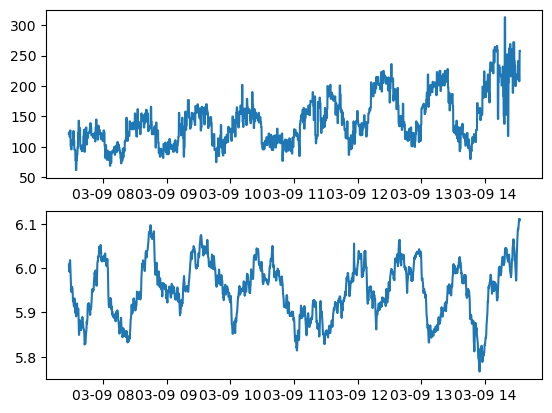

In [82]:
plt.subplot(2,1,1)
plt.plot(df.index, df['Campbell_Wind_Direction_True'], ls = '-')
plt.subplot(2,1,2)
plt.plot(df.index, df['Temp_SML_detrend'], ls = '-')


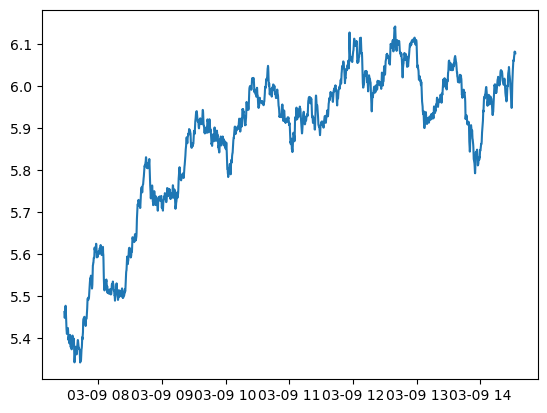

In [70]:
plt.plot(df.index, df['CTD_Temp_SML'], ls = '-')

In [22]:
#Detrending SML temperature with numpy poylonialfit

# time in total seconds
df['time_numeric'] = (df.index - df.index.min()).total_seconds()  

# fit polynomial with numpy.polyfit: linear and quadratic


coefficients = np.polyfit(df['time_numeric'], df['CTD_Temp_SML'], 2) # fit polynomial
polynomial = np.poly1d(coefficients) #create function
df[f'fitted_2_Temp_SML'] = polynomial(df['time_numeric']) #values
df[f'detrend_2_Temp_SML'] = df['CTD_Temp_SML'] - df[f'fitted_2_Temp_SML']
df[f'detrend_2_Temp_SML'] = df[f'detrend_2_Temp_SML'] + df[f'fitted_2_Temp_SML'].median()


In [23]:
# same for all depths
depths = [30, 40, 60, 85, 100]

for d in depths:
    coefficients = np.polyfit(df['time_numeric'], df[f'CTD_Temperature_{d}cm_[°C]'], 2) # fit polynomial
    polynomial = np.poly1d(coefficients) #create function
    df[f'fitted_2_Temp_{d}'] = polynomial(df['time_numeric']) #values
    df[f'detrend_2_Temp_{d}'] = df[f'CTD_Temperature_{d}cm_[°C]'] - df[f'fitted_2_Temp_{d}']
    df[f'detrend_2_Temp_{d}'] = df[f'detrend_2_Temp_{d}'] + df[f'fitted_2_Temp_{d}'].median()


# devide runs
df_first = df[df['time_numeric']<(df['time_numeric'].max())*0.5] # first run 
df_second = df[df['time_numeric']>=(df['time_numeric'].max())*0.5] # second run

runs = [df_first, df_second]

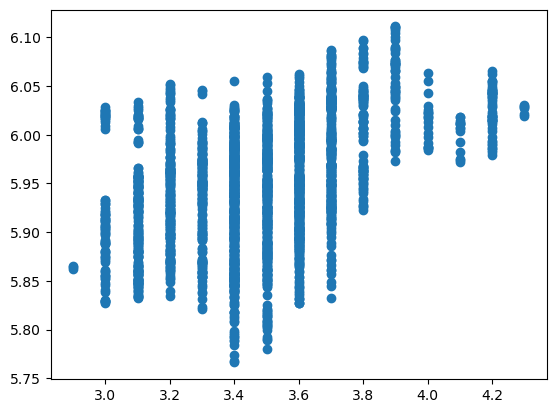

In [40]:
plt.scatter(df['Campbell_Air_Temperature'], df['detrend_2_Temp_SML'])

In [44]:
filtered_columns = [col for col in df.columns if 'Wind' in col]

In [45]:
filtered_columns

['Campbell_Wind_Speed',
 'Campbell_Wind_Direction_True',
 'Thies_Wind_Speed_CUS_MIN',
 'Thies_Wind_Speed_CUS_MAX',
 'Thies_Wind_Direction_CUS_MIN',
 'Thies_Wind_Direction_CUS_MAX',
 'Thies_Wind_Speed_CUS_AVG',
 'Thies_Wind_Direction_CUS_AVG',
 'Wind_Speed_U10']

In [ ]:
degrees = [1,2]
for degree in degrees:
    coefficients = np.polyfit(df['time_numeric'], df['CTD_Temp_SML'], degree) # fit polynomial
    polynomial = np.poly1d(coefficients) #create function
    df[f'fitted_{degree}_Temp_SML'] = polynomial(df['time_numeric']) #values
    df[f'detrend_{degree}_Temp_SML'] = df['CTD_Temp_SML'] - df[f'fitted_{degree}_Temp_SML']
    df[f'detrend_{degree}_Temp_SML'] = df[f'detrend_{degree}_Temp_SML'] + df[f'fitted_{degree}_Temp_SML'].mean()